# No-show appointments

>here we analyzed a dataset called No-show appointments ant it contained a collection of information
from 100k medical appointments in Brazil, so we analyze it to answer know what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment or not?

### Questions we will solve on our analysis:
1- Who books more appointment male or female patient?                                                                         
2- Is thier any relation between sms reciened and no-show?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.figure import Figure

# cleansing the dataset:

>I upload the dataset as a csv file to understand it and have a clear vision of how to clean the dirty data

In [2]:
# read the csv file..
rd = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
rd

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


The two codes below is to read the first and last 5 rows of the dataset

In [3]:
# read the first five rows..
rd.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# read the last five rows..
rd.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


we have to check the type for every column on the dataset, So we can change any data type that's not accurate

In [5]:
# to know the data type for each column and the number of data..
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we are going to check the name of the columns if it's appropriate and there is no duplicate

In [6]:
# this code to know the columns name..
rd.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
# there are no null values..
rd.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

here we are going to use (unique) function to list the data on each column to see if there is any unusual data

In [8]:
# to check if there is any unusuall data..
# we found that -1 (at the end) and it can't refer to an age..
rd['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [9]:
rd['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
rd['Scholarship'].unique()

array([0, 1], dtype=int64)

In [11]:
rd['Hipertension'].unique()

array([1, 0], dtype=int64)

In [12]:
rd['Diabetes'].unique()

array([0, 1], dtype=int64)

In [13]:
rd['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [14]:
rd['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
rd['SMS_received'].unique()

array([0, 1], dtype=int64)

In [16]:
rd['Gender'].unique()

array(['F', 'M'], dtype=object)

now we have to clean the dataset, 
first thing we changed the data type for (ScheduledDay) and (AppointmentDay) from object to date and time to make it more accurate

In [17]:
# I changed the data type to (date time) rather than (object) it's more accurate..
rd['ScheduledDay'] = pd.to_datetime(rd['ScheduledDay'])
rd['AppointmentDay'] = pd.to_datetime(rd['AppointmentDay'])

as we can see we change it successfully

In [18]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


like we mentioned before, we found an unusual value on the age column which is (-1), So we need to delete it because -1 can not be an age value

In [19]:
# to find the index for the dirty data so we can delete it..
rd.query("Age == '-1'")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


delete the row by it's index

In [20]:
# delete the wrong row..
rd.drop(index= 99832, inplace= True)

we tried the code below just to make sure we deleted the correct row

In [21]:
# check if we remove it successfully..
rd['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

I used numpy library to sort the age column to check if there is any negative value 

In [22]:
# sort the age column to make sure there are no negative data..
np.sort(rd['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

# analyze the dataset

>we analyze the dataset to find out if there are any factors we can cosider to predict if the patient will show up for there appointment

here we used the groupby function to count each gender and see the majority if it's female or male

In [23]:
#to know if the majority are female or male..
rd.groupby('Gender').count()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,,,,,,,,,,,,,
F,71839,71839,71839,71839,71839,71839,71839,71839,71839,71839,71839,71839,71839
M,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687


this plot below answers the previous question about the majority of the patients 

the majority are females

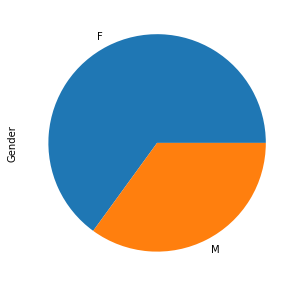

In [24]:
rd['Gender'].value_counts().plot(kind='pie', figsize=(5,5))


## Q- what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment or not?

>we took some variables to analyze to see if it's effected by other variables or not
so we checked if the gender is one of the elements that effect not showing on the appointment, and can we
guarantee that they will show up if they recieve an sms!, or is the age play a big role in not showing up process, or if the location of the hospital are an important factor to predict if the patient  will show up

I include a function to avoid repetitive code that will make it easy to read and understand

In [25]:
def plt_bar(rd, xVar, hueVar=None, palette=None ):
    g = sns.factorplot(x=xVar, hue=hueVar, data=rd, aspect=3.5, kind="count", legend_out=False, \
                         palette="pastel")
    plt.title(f'this plot is a visualisation for {xVar} and {hueVar}')

>I used the function above for the plots below

we checked each gender if they recieved an sms or not

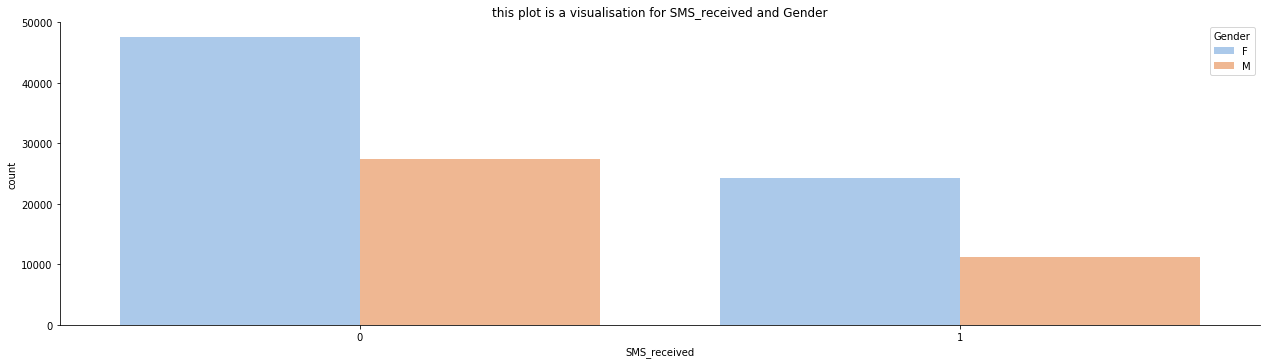

In [27]:
plt_bar(rd, 'SMS_received', hueVar='Gender')

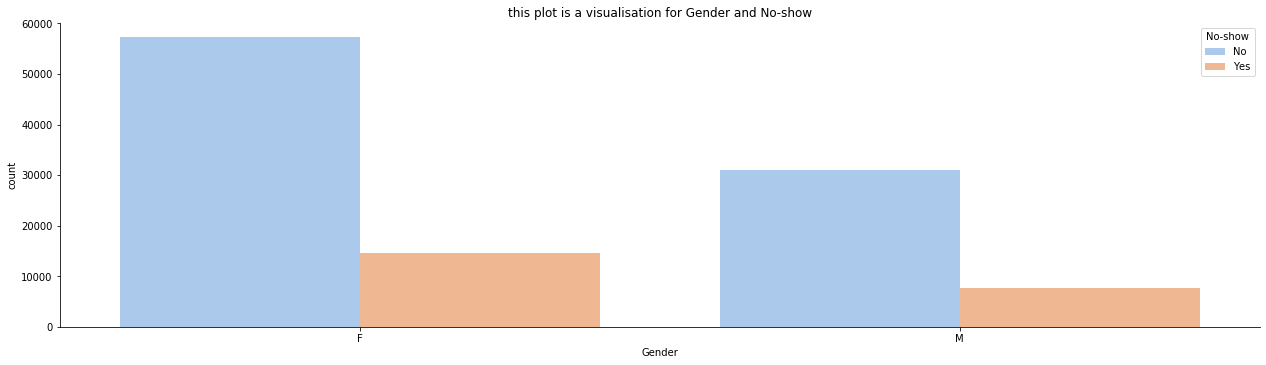

In [28]:
# the female patients came to thier appointment more than male patients..
plt_bar(rd, 'Gender', hueVar='No-show')

I grouped the gender based on if they recieved sms or not also if they showed up for the appointment

In [29]:
tbl_pt = pd.pivot_table(rd,values='No-show',  
                       index=['Gender', 'SMS_received'], aggfunc='count')
tbl_pt

No-show
Gender SMS_received         
F      0               47637
       1               24202
M      0               27407
       1               11280

this table showes us if the patient who came to thier appointment recieved an sms or no

In [30]:
rd[['No-show', 'SMS_received']].groupby(['No-show', 'SMS_received']).size()

No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
dtype: int64

the plot below is a visualisation for the table above

So there is a relation between the sms-recieved and no-show columns, the patients who recieved an sms came to thier appointement more than the one who does not recieved an sms

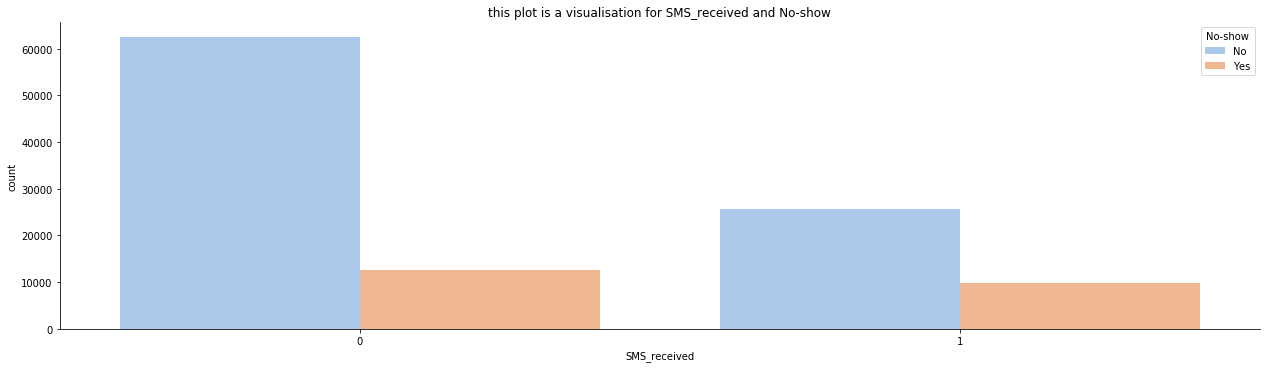

In [31]:
# here we see that theshowing up for the appointment depends on if the patient received an sms or not..
# if they received an sms they more likely to come to there appointment..
plt_bar(rd, 'SMS_received', hueVar='No-show')

on the plot below we have a visualisation for the age column and the No-show column to see if the not showing up to the appointment depends on the age category or not

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text xticklabel objects>)

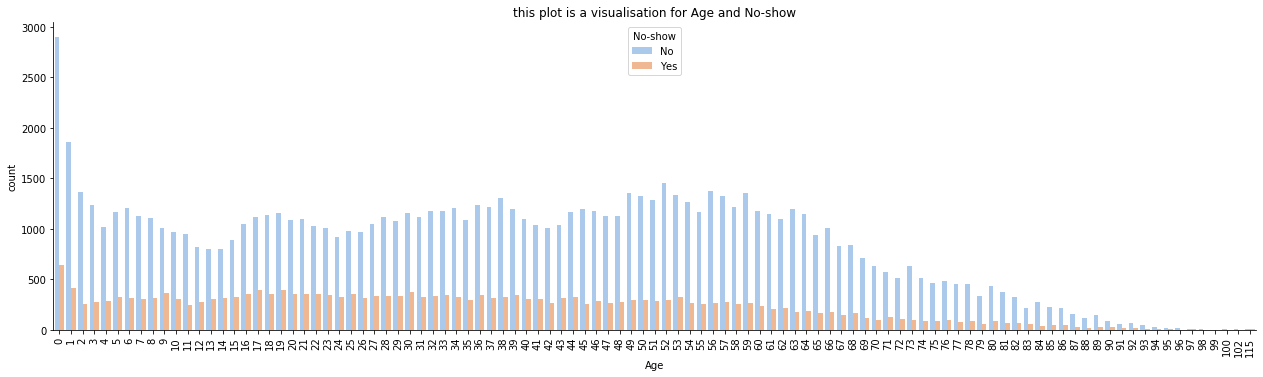

In [32]:
# on the age element the new born (age = 0) usually show up for the appointment..
plt_bar(rd, 'Age', hueVar='No-show')
plt.xticks(rotation=90)

we found out that the AppointmentDay element does not effect the not showing up process

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

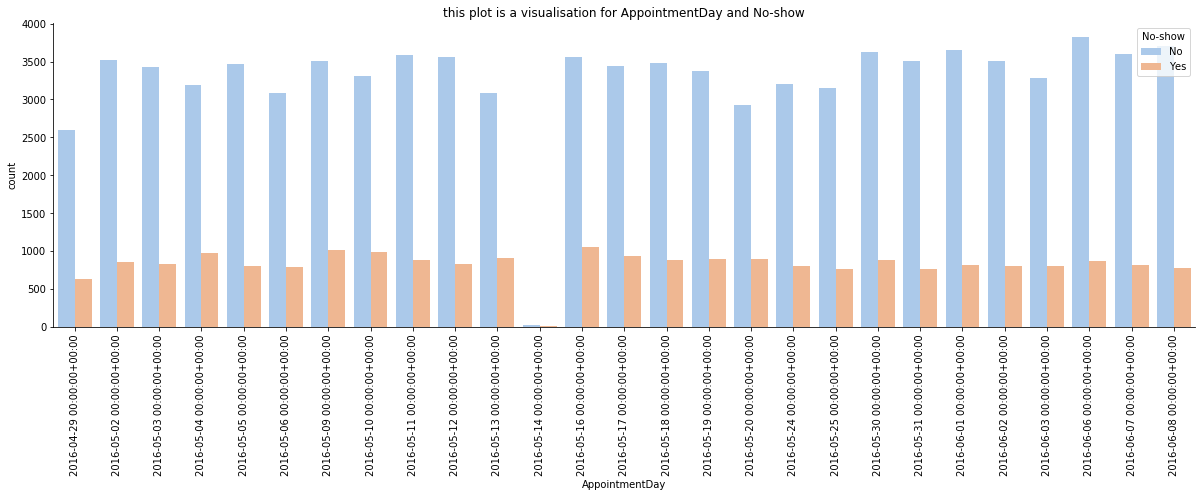

In [34]:
plt_bar(rd, 'AppointmentDay', hueVar='No-show')
plt.xticks(rotation=90)

at this last plot we compare the Neighbourhood with the no show cloumn, and it showes us that Neighbourhood effect the not shoing up element

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

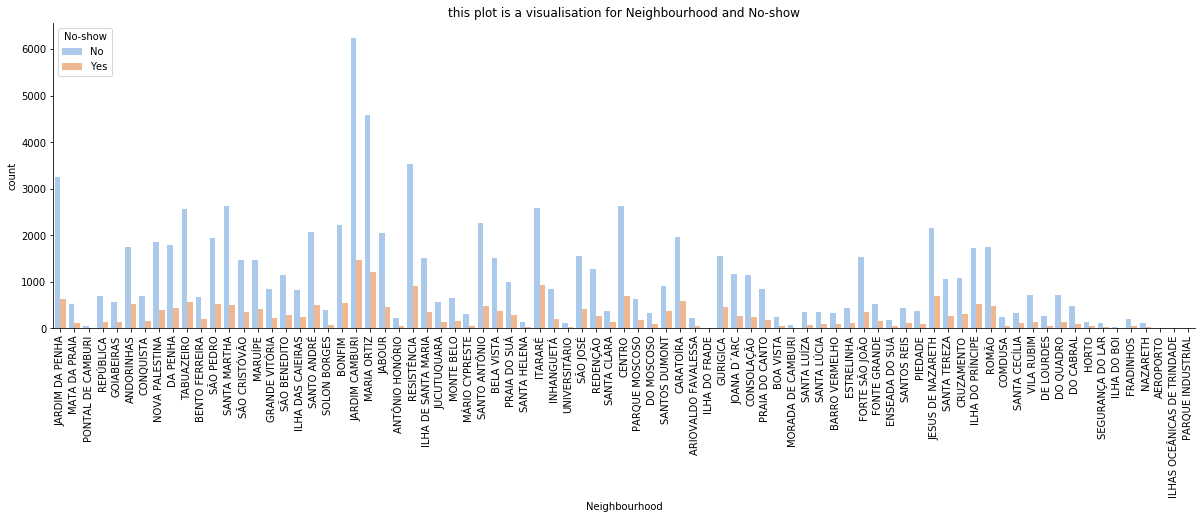

In [35]:
# as we can see the location of the hospital play a big role if the patient showed up ot not..
plt_bar(rd, 'Neighbourhood', hueVar='No-show')
plt.xticks(rotation=90)

the majority does not have any handicap as we can see on the plot below

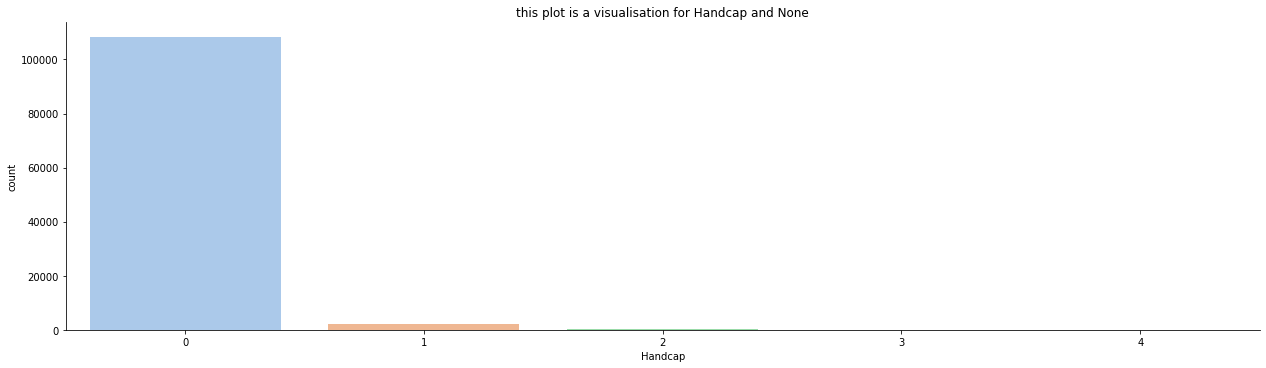

In [37]:
plt_bar(rd, 'Handcap')

patients with no handicap came to thier appointment more than patients with handicap, but maybe because they are more than patients with handicap

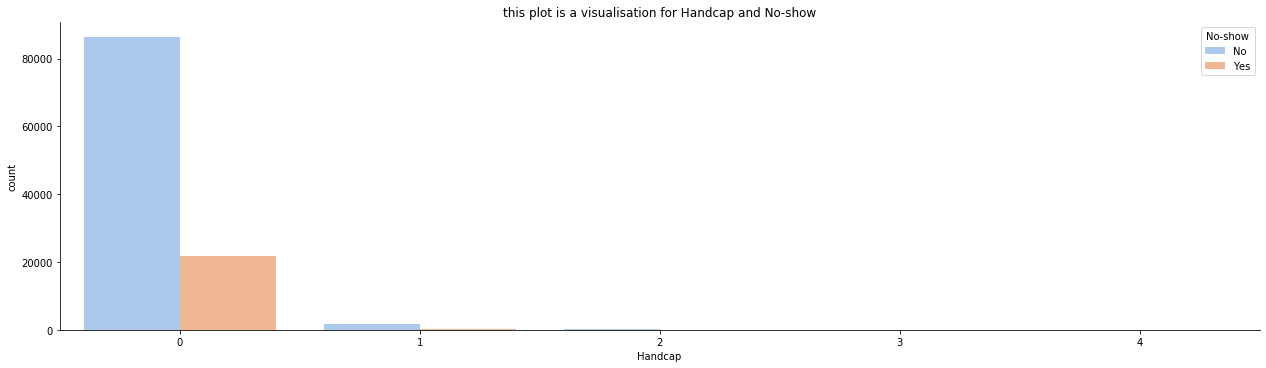

In [41]:
plt_bar(rd, 'Handcap', hueVar='No-show')

# Sammary

>it's hard to decide if there is one aspect that affect the show up processbecause we figure that each patient had a different problem with showing up,but We found out that the showing up to the appintment dependes more on the location of the hospital, the age of the patient because the new born or 1 years old more likely to show up to the appointment, the gender also effect the no-show variable because we realise that female patients came to thier appointment more than male patients, and the sms receiving element effect the show up element.

>So in conclusions the no-show variable depends on age, SMS_received, gender, and Neighbourhood variables.


But it's not clear if the patient with no handicap are more likely to attend thier appointment or it's because the majority of the patient do not have handicap!! So I think we need to know if they have it or not like Scholarship, Hipertension, Diabetes, and Alcoholism rather than the number of the handicap to make the analysis more accuaret.

# Reference
>Filtering data with Pandas .query() method     
https://www.tutorialspoint.com/python-filtering-data-with-pandas-query-method